<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/Introduction_to_NLP_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# checking if we are using GPU
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-e79fac01-9f84-57fe-583f-a6cc28318622)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-23 08:14:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-23 08:14:38 (50.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## GETTING THE DATASET

we will use kaggle dataset for our this experimentation.
https://www.kaggle.com/c/nlp-getting-started/data

In [4]:
# getting a text dataset 
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-08-23 08:14:40--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2021-08-23 08:14:41 (78.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data('nlp_getting_started.zip') # unzipped the dataset

## VISUALIZING OUR TEXT DATASET

In [6]:
# reading dataset using pandas library
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# shuffling training dataset so that our model doesnot learn any unwanted patterns.
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# how many examples of each class?
train_df_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# how many total samples
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# visualize the random training examples
import random
random_index = random.randint(0, len(train_df)-5) 
for row in train_df_shuffled[['text','target']][random_index : random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)" )
  print(f"text:\n{text}\n")
  print("-----\n")

Target: 1 (real disaster)
text:
Damage to school bus on 80 in multi car crash #BREAKING 

-----

Target: 1 (real disaster)
text:
@PrablematicLA @Adweek I'm actually currently dressed for a snowstorm...despite being in the middle of a Texas summer. Thanks office A/C.

-----

Target: 1 (real disaster)
text:
I liked a @YouTube video http://t.co/z8Cp77lVza Boeing 737 takeoff in snowstorm. HD cockpit view + ATC audio - Episode 18

-----

Target: 0 (not real disaster)
text:
Anti Collision Rear- #technology #cool http://t.co/hK6nQrGedb

-----

Target: 0 (not real disaster)
text:
Sign the petition @david_cameron to protect bees instead of toxic chemical companies want to harm them! #savebees  - http://t.co/dB7ft3Yi6d

-----



### split data into training and validation sets


In [12]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [14]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [15]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

In [16]:
val_sentences[0:10] # viewing initial 10 sentences

array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
       'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
       'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
       '@camilacabello97 Internally and externally screaming',
       'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
       'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
       'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
       "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern C

In [17]:
val_labels[0:30] # viewing initial 30 labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0])

## CONVERTING TEXT TO NUMBERS

In [18]:
import tensorflow
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [19]:
# # use the default text vectorization parameters
# text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabluary
#                                     standardize='lower_and_strip_punctuation',
#                                     split='whitespace',
#                                     ngrams=None,
#                                     output_mode='int',
#                                     output_sequence_length=None,
#                                     pad_to_max_tokens=True)

In [20]:
# find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
# so there are 15 words in every tweet on average

15

In [21]:
# setup text vectorization variables
max_vocab_length = 10000 # maximum number of words to have in our dictionary
max_length = 15 # max length our sequence will be
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length=max_length)

In [22]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [23]:
# create a sample sentence and tokenize it
sample_sentence = ['hello, this is kunal from pakistan']
text_vectorizer(sample_sentence) # here we can see we have padded with zero's as there are zeros in the last to complete it to 15

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1400,   19,    9,    1,   20,  811,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [24]:
# choose a random sentence from our training data and tokenize it
random_sentence = random.choice(train_sentences)
print(f"original sentence:\n {random_sentence} \
     \n\n vectorized_version:\n")
text_vectorizer([random_sentence])

original sentence:
 @AdamRubinESPN Familia: arm injury or head case?      

 vectorized_version:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 5670, 4135,  345,   53,  331,  823,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [25]:
# getting the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() 
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"number of words in vocabulary: {len(words_in_vocab)}")
print(f"5 most commom words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

number of words in vocabulary: 10000
5 most commom words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [26]:
# words_in_vocab -> we can see the vocabulary this way

## CREATING AN EMBEDDING USING AN EMBEDDING LAYER

In [27]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128, input_length = max_length)

In [28]:
# get a random sentence from our training data
random_sentence = random.choice(train_sentences)
print(f"original texrt:\n {random_sentence} \
       \n\n embedded version:\n "
      )
# embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original texrt:
 Everyday is a near death fatality for me on the road. Thank god is on my side.??        

 embedded version:
 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01707091,  0.04358722,  0.0428167 , ...,  0.02715712,
         -0.04575592, -0.02515835],
        [-0.03941928,  0.04088068,  0.02135276, ...,  0.01927103,
         -0.00960314, -0.02176775],
        [-0.03422534, -0.041835  ,  0.00485262, ..., -0.01490664,
         -0.0002969 ,  0.02357397],
        ...,
        [-0.0074195 , -0.02356559,  0.02812687, ..., -0.04940504,
          0.00389164,  0.0249801 ],
        [-0.03941928,  0.04088068,  0.02135276, ...,  0.01927103,
         -0.00960314, -0.02176775],
        [ 0.01900594,  0.04087274, -0.01963401, ...,  0.02724764,
         -0.04979111,  0.0220452 ]]], dtype=float32)>

In [29]:
# check out a single token's embed
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.01707091,  0.04358722,  0.0428167 ,  0.021996  , -0.03269835,
         0.04970194, -0.01927955,  0.00736257, -0.04363609,  0.03044752,
        -0.00042617,  0.04445574,  0.02001068,  0.04506389,  0.0224406 ,
        -0.03186969,  0.00048139,  0.03565839, -0.03712634,  0.04580826,
         0.02491525,  0.03313926, -0.00353302,  0.01195226,  0.02682524,
        -0.02561603,  0.01428633,  0.0090827 , -0.03629099,  0.01612426,
        -0.03489687,  0.01634342, -0.02125598,  0.02090137, -0.01651298,
         0.04784283,  0.00812709,  0.01206832, -0.04285739,  0.03064617,
         0.04053476,  0.02904927, -0.00046812,  0.03738992,  0.02926734,
         0.04007895, -0.00795163,  0.03137249, -0.03573998,  0.01010791,
         0.02881316, -0.00115835, -0.03611046,  0.02366597,  0.0029636 ,
        -0.01006158, -0.00095798,  0.02829922, -0.04897782, -0.0423503 ,
        -0.03182552,  0.02545453, -0.04189019, -0.02472404, -0.04343503,
  

### MODEL 0: NAIVE BAYES (BASELINE)

* we will use `tfidf` to convert our texts into numbers

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0 = Pipeline(
    [
     ('tfidf', TfidfVectorizer()), # convert words to numbers using tfidf
     ('clf', MultinomialNB()) # model the text
    ]
)

# fit the pipeline to our training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [31]:
# evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
# default evaluatio matrix in scikit learn is accuracy

In [32]:
print(f"our baseline model achieves an accuracy of: {baseline_score*100:.2f} %")

our baseline model achieves an accuracy of: 79.27 %


In [33]:
# we will predict on our validation data now
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

creating an evaluation function for our model experiments. we will use the following metrics for evaluation.


1.   Accuracy
2.   Precision
3.   Recall
4.   F1-score



In [34]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_score(y_true, y_pred):
  """
  calculates model accuracy, precision, recall, f1-score
  """
  # calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # calculate model precision, recall, f1-score using weighted score
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {
      'accuracy': model_accuracy,
      'precision': precision,
      'recall': recall,
      'f1-score': f1_score
  }
  return model_results

In [35]:
# get baseline results
baseline_results = calculate_score(y_true=val_labels,
                                     y_pred = baseline_preds,
                                     )
baseline_results

{'accuracy': 79.26509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### MODEL 1: A SIMPLE DENSE MODEL

In [36]:
# create a tensorboard callback
from helper_functions import create_tensorboard_callback

# creating a directory to save our tensorboard logs
save_dir = 'model_logs'

In [37]:
# build model with functional API
import tensorflow as tf
from tensorflow.keras import layers
input = layers.Input(shape=(1,), dtype=tf.string) # inputs are one dimensionl strings
x = text_vectorizer(input) # turn the inputs into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
output = layers.Dense(1, activation='sigmoid')(x) # create the output layer
model_1 = tf.keras.Model(input, output, name='model_1_dense')

In [38]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [39]:
# compile model_1
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

In [40]:
# fit the model
model_1_history = model_1.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=save_dir, experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20210823-081449
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.6112 - accuracy: 0.6919 - val_loss: 0.5383 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4418 - accuracy: 0.8197 - val_loss: 0.4698 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3473 - accuracy: 0.8612 - val_loss: 0.4616 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2851 - accuracy: 0.8930 - val_loss: 0.4619 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2390 - accuracy: 0.9092 - val_loss: 0.4768 - val_accuracy: 0.7808


In [41]:
# check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.7808


[0.4767929017543793, 0.7808399200439453]

In [42]:
# make some predictions and evaluate those
model_1_pred_prob = model_1.predict(val_sentences)
model_1_pred_prob.shape
model_1_pred_prob

array([[0.50006175],
       [0.7583352 ],
       [0.9973808 ],
       [0.1791971 ],
       [0.11235416],
       [0.95082545],
       [0.92065024],
       [0.9942669 ],
       [0.9722171 ],
       [0.37357482],
       [0.15300074],
       [0.7105005 ],
       [0.0784554 ],
       [0.20463477],
       [0.00553106],
       [0.21343939],
       [0.03226073],
       [0.11389899],
       [0.3729315 ],
       [0.6797111 ],
       [0.92345095],
       [0.04671299],
       [0.4760357 ],
       [0.11516622],
       [0.95940363],
       [0.9990096 ],
       [0.05221637],
       [0.11882791],
       [0.03719688],
       [0.24096575],
       [0.653308  ],
       [0.34690052],
       [0.49752772],
       [0.1958033 ],
       [0.6107333 ],
       [0.08043661],
       [0.99496585],
       [0.22249831],
       [0.04299125],
       [0.9986603 ],
       [0.26625407],
       [0.02643533],
       [0.33698466],
       [0.10161106],
       [0.69670016],
       [0.98577744],
       [0.4041463 ],
       [0.920

In [43]:
# convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_prob))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [44]:
# calculate our model_1 results
model_1_results = calculate_score(val_labels,model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'f1-score': 0.7798778043941109,
 'precision': 0.7809067257781027,
 'recall': 0.7808398950131233}

### VISUALIZING LEARNED EMBEDDINGS

In [45]:
# get vocabulary from our text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary() # we have previously also instantiated it, but for better visualization we are doing it again here.
len(words_in_vocab), words_in_vocab[:20] # twenty most frequent words

(10000,
 ['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with',
  'it',
  'that',
  'at',
  'by',
  'this'])

In [46]:
max_vocab_length

10000

In [47]:
# get the weight matrix of our embedding layer which has been learned over 5 epochs
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights , embed_weights.shape # for every token in our vocab, it is represented by total of 128 vectors

(array([[ 0.04146543,  0.02975256, -0.01084197, ...,  0.00643798,
         -0.03474166, -0.045288  ],
        [ 0.00426123, -0.00372232, -0.0314869 , ...,  0.01875492,
          0.01280072,  0.05261827],
        [-0.00728893,  0.02577698, -0.04471824, ...,  0.06685892,
          0.00267629, -0.01728927],
        ...,
        [-0.04093258,  0.00211409,  0.02172944, ..., -0.03858624,
          0.01010894,  0.00446932],
        [-0.0065586 , -0.00551059, -0.08302972, ..., -0.01486439,
          0.01053048, -0.05819404],
        [ 0.09946643, -0.07924651, -0.08286242, ...,  0.04362113,
          0.02571165, -0.0845051 ]], dtype=float32), (10000, 128))

now we will try to visualize embedding layer into a great tensorflow tool called projector.
it is a embedding projector.

In [48]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

### MODEL 2: LSTM (LONG SHORT TERM MEMORY)

In [49]:
# creating model with LSTM layer
from tensorflow.keras import layers
input = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(input)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(input, output, name='model_2')

In [50]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65  

In [51]:
train_labels.dtype, val_labels.dtype, train_sentences.dtype, val_sentences.dtype

(dtype('int64'), dtype('int64'), dtype('O'), dtype('O'))

In [52]:
# compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [53]:
# fitting our model_2 on our training data
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir, experiment_name='model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20210823-081503
Epoch 1/5
215/215 [==============================] - 10s 22ms/step - loss: 0.2241 - accuracy: 0.9237 - val_loss: 0.5998 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1590 - accuracy: 0.9407 - val_loss: 0.5337 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1286 - accuracy: 0.9511 - val_loss: 0.6299 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1098 - accuracy: 0.9575 - val_loss: 0.8752 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0872 - accuracy: 0.9651 - val_loss: 0.8929 - val_accuracy: 0.7664


In [54]:
# make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10] # looking at first 10 probabilities

array([[0.01480275],
       [0.5914624 ],
       [0.9999825 ],
       [0.11367973],
       [0.00103472],
       [0.9999032 ],
       [0.98574334],
       [0.9999908 ],
       [0.999984  ],
       [0.53589517]], dtype=float32)

In [55]:
# converting our prediction probabilities into labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [56]:
# calculate model 2 results
model_2_results = calculate_score(val_labels,model_2_preds)
model_2_results

{'accuracy': 76.64041994750657,
 'f1-score': 0.7648999840928975,
 'precision': 0.7668867353119322,
 'recall': 0.7664041994750657}

In [57]:
model_1_results

{'accuracy': 78.08398950131233,
 'f1-score': 0.7798778043941109,
 'precision': 0.7809067257781027,
 'recall': 0.7808398950131233}

### MODEL 3: GRU (GATED RECURRENT UNIT)

In [58]:
# another popular and effective component of RNN is GRU
# GRU cell has similiar features compared to LSTM cell but has less parameters

# building an RNN using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
# x = layers.LSTM(64, return_sequences=True)(x)
# x = layers.GRU(64)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)

In [59]:
# get a summary
model_3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 15, 64)            37248     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65    

In [60]:
# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [61]:
# fitting our model_3 on our training data
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir, experiment_name='model_3')])

Saving TensorBoard log files to: model_logs/model_3/20210823-081528
Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.1619 - accuracy: 0.9483 - val_loss: 0.7055 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0918 - accuracy: 0.9658 - val_loss: 0.9723 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0704 - accuracy: 0.9712 - val_loss: 1.3423 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0593 - accuracy: 0.9747 - val_loss: 1.1759 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0512 - accuracy: 0.9768 - val_loss: 1.3639 - val_accuracy: 0.7559


In [62]:
model_3_pred_prob = model_3.predict(val_sentences)
model_3_pred_prob[:10]

array([[8.9076050e-02],
       [9.6563596e-01],
       [9.9999774e-01],
       [1.4810225e-01],
       [1.8412102e-05],
       [9.9998796e-01],
       [9.9808830e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.5142555e-01]], dtype=float32)

In [63]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_prob))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [64]:
model_3_results = calculate_score(val_labels,model_3_preds)
model_3_results

{'accuracy': 75.59055118110236,
 'f1-score': 0.7549846322026649,
 'precision': 0.7555819221227483,
 'recall': 0.7559055118110236}

### MODEL 4: BIDIRECTIONAL `RNN`

In [65]:
# building an Bidirectional RNN in tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)

In [66]:
# getting a summary of the model
model_4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
_________________________________________________

In [67]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [68]:
# fitting our model_4 on our training data
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir, experiment_name='model_4')])

Saving TensorBoard log files to: model_logs/model_4/20210823-081553
Epoch 1/5
215/215 [==============================] - 14s 34ms/step - loss: 0.1000 - accuracy: 0.9672 - val_loss: 1.0061 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0555 - accuracy: 0.9749 - val_loss: 1.2989 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0469 - accuracy: 0.9768 - val_loss: 1.3540 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0406 - accuracy: 0.9774 - val_loss: 1.4618 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0439 - accuracy: 0.9783 - val_loss: 1.4751 - val_accuracy: 0.7598


In [69]:
model_4_pred_prob = model_4.predict(val_sentences)
model_4_pred_prob[:10]

array([[6.3882452e-03],
       [8.0651420e-01],
       [9.9992800e-01],
       [3.6884776e-01],
       [2.4832947e-05],
       [9.9959022e-01],
       [9.9071574e-01],
       [9.9995995e-01],
       [9.9994206e-01],
       [9.9909818e-01]], dtype=float32)

In [70]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_prob))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [71]:
model_4_results = calculate_score(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'f1-score': 0.7592519153247733,
 'precision': 0.759424508748149,
 'recall': 0.7598425196850394}

### MODEL 5: CONV1D

In [72]:
# testing our embedding layer, maxpoollayer and convolutional layer

embedding_test = embedding(text_vectorizer(['this is a test sentence']))

conv_layer = layers.Conv1D(filters=32,
                           kernel_size=5, # this is also referred to as ngram of 5, meaning it looks at 5 words at a time.
                           strides=1,
                           activation='relu',
                           padding='same')

conv_output = conv_layer(embedding_test) # pass test embedding through convolutional layer

pooling_layer = layers.GlobalMaxPool1D() 

pooling_output = pooling_layer(conv_output) # pass convolutional layer through pooling layer

embedding_test.shape, conv_output.shape, pooling_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [73]:
# apply 1 dimensional convolutional layer to model sequence

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs)

# compiling model_5
model_5.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# getting the model summary
model_5.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
_________________________________________________

In [74]:
# fitting our model_5 on our training data
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir, experiment_name='model_5')])

Saving TensorBoard log files to: model_logs/model_5/20210823-081705
Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.1224 - accuracy: 0.9580 - val_loss: 0.9154 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0749 - accuracy: 0.9729 - val_loss: 1.0678 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0619 - accuracy: 0.9765 - val_loss: 1.1209 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0576 - accuracy: 0.9766 - val_loss: 1.1658 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0515 - accuracy: 0.9799 - val_loss: 1.2174 - val_accuracy: 0.7480


In [75]:
model_5_pred_prob = model_5.predict(val_sentences)
model_5_pred_prob[:10]

array([[7.8767914e-01],
       [8.1801373e-01],
       [9.9997306e-01],
       [7.1071811e-02],
       [1.5558492e-06],
       [9.9851674e-01],
       [9.7928613e-01],
       [9.9992228e-01],
       [9.9999988e-01],
       [8.7005198e-01]], dtype=float32)

In [76]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_prob))
model_5_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [77]:
model_5_results = calculate_score(val_labels, model_5_preds) # it did not perform better than our baseline model.
model_5_results

{'accuracy': 74.80314960629921,
 'f1-score': 0.747772153828496,
 'precision': 0.7476785153737577,
 'recall': 0.7480314960629921}

In [78]:
model_1_results

{'accuracy': 78.08398950131233,
 'f1-score': 0.7798778043941109,
 'precision': 0.7809067257781027,
 'recall': 0.7808398950131233}

### MODEL 6: TENSORFLOW HUB PRETRAINED SENTENCE ENCODER

In [79]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [80]:
embed_sample = embed(["sentence will be encoded","universal sentence enocder turns the text into numbers"])

In [81]:
embed_sample

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.02344938,  0.00461691,  0.01465249, ..., -0.01021899,
         0.04326298, -0.01063718],
       [ 0.00858217, -0.07967576, -0.02826347, ..., -0.0003553 ,
         0.04516176,  0.00421465]], dtype=float32)>

In [82]:
# create a keras layer using universal sentence encoder from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # we passed in empty vector because input text can be of variable length
                                        dtype = tf.string,
                                        trainable=False,
                                        name='USE')

In [83]:
# create model using sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation='relu'),
                               layers.Dense(1, activation='sigmoid')
], name='model_6')

# compiling model_6
model_6.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# getting summary
model_6.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [84]:
# fitting our model_6 on our training data
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir, experiment_name='model_6')])

Saving TensorBoard log files to: model_logs/model_6/20210823-081738
Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.5068 - accuracy: 0.7865 - val_loss: 0.4477 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4144 - accuracy: 0.8146 - val_loss: 0.4451 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4018 - accuracy: 0.8209 - val_loss: 0.4314 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3926 - accuracy: 0.8251 - val_loss: 0.4342 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3869 - accuracy: 0.8294 - val_loss: 0.4272 - val_accuracy: 0.8110


In [85]:
model_6_pred_prob = model_6.predict(val_sentences)
model_6_pred_prob[:10]

array([[0.19783682],
       [0.85883874],
       [0.9914049 ],
       [0.23060223],
       [0.7941819 ],
       [0.772797  ],
       [0.9883334 ],
       [0.9835707 ],
       [0.9519909 ],
       [0.11789756]], dtype=float32)

In [86]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_prob))
model_6_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [87]:
model_6_results = calculate_score(val_labels,model_6_preds) # finally, we have beaten our baseline model.
model_6_results

{'accuracy': 81.10236220472441,
 'f1-score': 0.8103850144931918,
 'precision': 0.8111174658494981,
 'recall': 0.8110236220472441}

In [88]:
model_1_results

{'accuracy': 78.08398950131233,
 'f1-score': 0.7798778043941109,
 'precision': 0.7809067257781027,
 'recall': 0.7808398950131233}

### MODEL 7: TENSORFLOW HUB PRETRAINED UNIVERSAL SENTENCE ENCODER WITH 10% OF TRAINING DATA

Transfer learning really helps when we donot have a very large dataset.

we will replicate model_6 here but with 10 percent of training data and will see how our model_7 performs.

In [89]:
# # NOTE: creating data split like below leaded to data leakage.
# # donot split data in such a way that some of the data of test/validation set is present in training set.


# # create subsets of 10% of training data
# train_10_percent = train_df_shuffled[['text','target']].sample(frac=0.1, random_state=42)
# train_10_percent.info()
# train_10_percent.head()
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [90]:
# Making a better dataset split (no data leakage)

train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent_split

685

In [91]:
train_sentences_10_percent = train_sentences[:train_10_percent_split]
len(train_sentences_10_percent)

685

In [92]:
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [93]:
# check the numbe of each label in the updated training dataset

import numpy as np

pd.Series(np.array(train_labels_10_percent)).value_counts()

# so we have fairly goof distribution, we could have made it more better, but for now, let's take this. 

0    406
1    279
dtype: int64

In [94]:
# # check the number of targets in our subset of data
# train_10_percent['target'].value_counts()

# # so we have roughly same distribution of labels. it is neccessary as if distribution is not equal, 
# #the predictions will be vague sometimes due to the model not being trained enoough with particular text corresponding to the target.

In [95]:
# train_df_shuffled['target'].value_counts()

In [96]:
# let's build a model same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# compile model_7
model_7.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# getting the summary
model_7.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [97]:
# fitting our model on our 10 percent of training data
model_7_history = model_7.fit(train_sentences_10_percent, train_labels_10_percent, epochs=5,
                              validation_data = (val_sentences, val_labels), 
                              callbacks=[create_tensorboard_callback(dir_name=save_dir, experiment_name='model_7_with correct split')])

Saving TensorBoard log files to: model_logs/model_7_with correct split/20210823-081809
Epoch 1/5
22/22 [==============================] - 6s 152ms/step - loss: 0.6664 - accuracy: 0.6745 - val_loss: 0.6466 - val_accuracy: 0.7100
Epoch 2/5
22/22 [==============================] - 1s 31ms/step - loss: 0.5970 - accuracy: 0.7912 - val_loss: 0.5907 - val_accuracy: 0.7480
Epoch 3/5
22/22 [==============================] - 1s 45ms/step - loss: 0.5221 - accuracy: 0.8175 - val_loss: 0.5372 - val_accuracy: 0.7848
Epoch 4/5
22/22 [==============================] - 1s 31ms/step - loss: 0.4616 - accuracy: 0.8219 - val_loss: 0.5045 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 1s 31ms/step - loss: 0.4206 - accuracy: 0.8321 - val_loss: 0.4919 - val_accuracy: 0.7808


In [98]:
model_7_pred_prob = model_7.predict(val_sentences)
model_7_pred_prob[:10]

array([[0.19934306],
       [0.57541347],
       [0.9073732 ],
       [0.35801095],
       [0.5494603 ],
       [0.67518103],
       [0.88096356],
       [0.8096875 ],
       [0.84383434],
       [0.14835522]], dtype=float32)

In [99]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_prob))
model_7_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [100]:
# calculate_score(val_labels, model_7_preds)

# # the results we have got with 10 percent of our training data is even better than
# # the results we got after training our model on whole datasets. why is it so?

# # this is the problem of data leakage.
# # we created 10 percent dataset using train_df_shuffled and also we created val_sentences using train_df_shuffled.
# # some of the data is already present in train_10_percent which are present in train_df_shuffled. so our has some seen data 
# # and thus it performs better because it has learned.

In [101]:
model_7_results = calculate_score(val_labels, model_7_preds)
model_7_results
# now we can see the accuracy of the model trained with 10 percent of data is less.
# we could not outperform our baseline model

{'accuracy': 78.08398950131233,
 'f1-score': 0.7790338643605079,
 'precision': 0.7823342077218286,
 'recall': 0.7808398950131233}

In [102]:
calculate_score(val_labels, model_6_preds)

{'accuracy': 81.10236220472441,
 'f1-score': 0.8103850144931918,
 'precision': 0.8111174658494981,
 'recall': 0.8110236220472441}

In [103]:
model_1_results

{'accuracy': 78.08398950131233,
 'f1-score': 0.7798778043941109,
 'precision': 0.7809067257781027,
 'recall': 0.7808398950131233}

### COMPARING THE PERFORMANCE OF EACH OF OUR MODELS

In [104]:
# combine model results into a dataframe
all_models_result = pd.DataFrame({'baseline': baseline_results,
                                  'simple_dense': model_1_results,
                                  'LSTM': model_2_results,
                                  'GRU': model_3_results,
                                  'bidirectional': model_4_results,
                                  'Conv1D': model_5_results,
                                  'transfer_learning': model_6_results,
                                  'transfer_learning_on_10%_data': model_7_results})
all_models_result = all_models_result.transpose()

In [105]:
# reduce the accuracy to the same scale as other metrics
all_models_result['accuracy'] = all_models_result['accuracy']/100.0

In [106]:
all_models_result

,accuracy,precision,recall,f1-score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.780840,0.780907,0.780840,0.779878
LSTM,0.766404,0.766887,0.766404,0.764900
GRU,0.755906,0.755582,0.755906,0.754985
bidirectional,0.759843,0.759425,0.759843,0.759252
Conv1D,0.748031,0.747679,0.748031,0.747772
transfer_learning,0.811024,0.811117,0.811024,0.810385
transfer_learning_on_10%_data,0.780840,0.782334,0.780840,0.779034


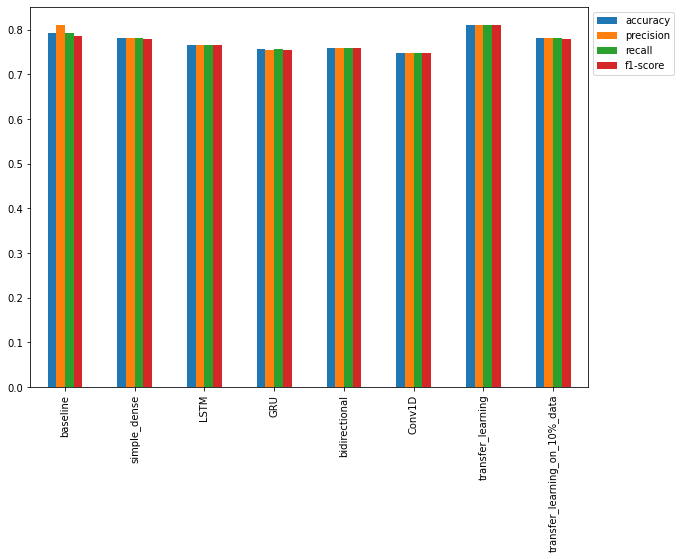

In [107]:
# plot and compare all of the model results
all_models_result.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

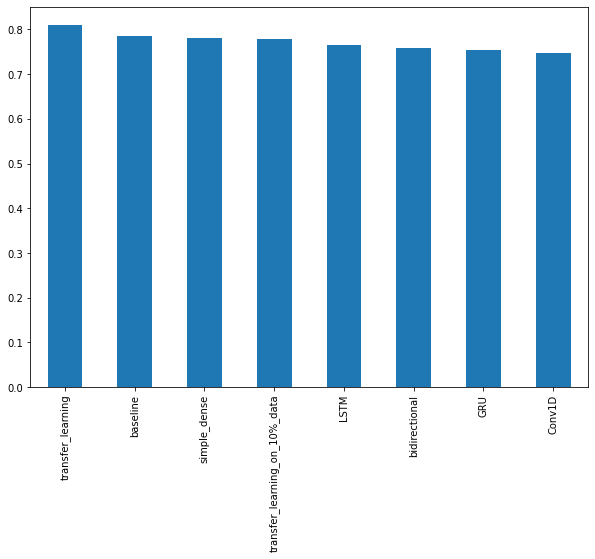

In [108]:
# sort model results by f1-score
all_models_result.sort_values('f1-score', ascending=False)['f1-score'].plot(kind='bar', figsize=(10,7));

### uploading our model training logs to TensorBoard.dev


In [109]:
# we will further inspect our models performance using TensorBoard.dev
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP modelling experiments" \
  --description "comparing different types of model architectures on kaggle tweet text classification" \
  --one_shot # exit the uploader once uploading is finished

2021-08-23 08:18:26.968695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-23 08:18:26.990369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-23 08:18:26.991056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Po

### SAVING AND LOADING A TRAINED MODEL

In [110]:
# save transfer learning model HDF5 format
model_6.save('model_6.h5')

In [111]:
# load model with custom hub layer
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5", custom_objects={"KerasLayer": hub.KerasLayer})

In [112]:
# how does our loaded model performs
loaded_model_6.evaluate(val_sentences, val_labels)
# our loaded model evaluates the same.

24/24 [==============================] - 1s 14ms/step - loss: 0.4272 - accuracy: 0.8110


[0.427209734916687, 0.8110235929489136]

In [113]:
model_6_results

{'accuracy': 81.10236220472441,
 'f1-score': 0.8103850144931918,
 'precision': 0.8111174658494981,
 'recall': 0.8110236220472441}

now, let's save to save model format

In [114]:
# save our transfer learning model to SavedModel format (default)
model_6.save("model_6_savedmodel_format")

INFO:tensorflow:Assets written to: model_6_savedmodel_format/assets


INFO:tensorflow:Assets written to: model_6_savedmodel_format/assets


In [115]:
# load our model from savemodel format
loaded_model_6_savedmodel_format = tf.keras.models.load_model("model_6_savedmodel_format") # we don't need to pass custom object in this.

In [116]:
loaded_model_6_savedmodel_format.evaluate(val_sentences,val_labels)
# our loaded model is evaluating the same as our unsaved model.

24/24 [==============================] - 1s 15ms/step - loss: 0.4272 - accuracy: 0.8110


[0.427209734916687, 0.8110235929489136]

In [117]:
model_6_results

{'accuracy': 81.10236220472441,
 'f1-score': 0.8103850144931918,
 'precision': 0.8111174658494981,
 'recall': 0.8110236220472441}

### FINDING THE MOST WRONG EXAMPLES

This is also called model driven data exploration.

for example: if our sample should have label 0, but our model is predicting prediction 1 (prediction probability very close to 1) and vice versa.

In [118]:
# download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2021-08-23 08:28:26--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  40.6MB/s    in 13s     

2021-08-23 08:28:40 (69.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [119]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [120]:
# import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [121]:
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [122]:
# making predictions with the help of our loaded model
model_6_pretrained_pred_prob = model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred_prob

array([[0.15975739],
       [0.747162  ],
       [0.98874855],
       [0.19622944],
       [0.7078078 ],
       [0.70967495],
       [0.98190695],
       [0.9810662 ],
       [0.94574374],
       [0.08504027],
       [0.5865289 ],
       [0.5043442 ],
       [0.14771107],
       [0.47138923],
       [0.23241065],
       [0.0264297 ],
       [0.34196842],
       [0.5798138 ],
       [0.32017288],
       [0.30561873],
       [0.91616416],
       [0.11672409],
       [0.44983855],
       [0.0371858 ],
       [0.8907019 ],
       [0.9726116 ],
       [0.06691607],
       [0.11293408],
       [0.09126016],
       [0.31542996],
       [0.46357128],
       [0.91019577],
       [0.42712083],
       [0.26243824],
       [0.53864133],
       [0.08706519],
       [0.9805033 ],
       [0.0632422 ],
       [0.03899793],
       [0.98444635],
       [0.07138808],
       [0.24111237],
       [0.40415815],
       [0.5092295 ],
       [0.23785055],
       [0.965647  ],
       [0.36541235],
       [0.957

In [123]:
# converting our prediction probabilities into labels
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_prob))
model_6_pretrained_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [124]:
# create a dataframe with our validation_sentences, validation labels, best performing model prediction labels + probabilities

val_df = pd.DataFrame({
    "text":val_sentences,
    "target":val_labels,
    "pred": model_6_pretrained_preds,
    "pred_prob": tf.squeeze(model_6_pretrained_pred_prob)
})

val_df.head()


,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [125]:
# find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)

In [126]:
most_wrong.head(10) # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [127]:
most_wrong.tail(10) # these are false negatives

,text,target,pred,pred_prob
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


let's remind ourselves of labels

0: `disaster`

1: `not disaster`

In [128]:
# check the false positives (model predicted 1 when should have been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target : {target}, pred : {pred}, prediction_probabilities : {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----------------------\n")


Target : 0, pred : 1.0, prediction_probabilities : 0.9101957678794861
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----------------------

Target : 0, pred : 1.0, prediction_probabilities : 0.8769821524620056
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----------------------

Target : 0, pred : 1.0, prediction_probabilities : 0.8523000478744507
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----------------------

Target : 0, pred : 1.0, prediction_probabilities : 0.8354544043540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----------------------

Target : 0, pred : 1.0, prediction_probabilities : 0.8272134065628052
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anyt

In [129]:
# check the false negatives (model predicted 0 when should have been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target : {target}, pred : {pred}, prediction_probabilities : {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----------------------\n")


Target : 1, pred : 0.0, prediction_probabilities : 0.06730346381664276
Text: 
@DavidVonderhaar At least you were sincere ??

----------------------

Target : 1, pred : 0.0, prediction_probabilities : 0.05507582053542137
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----------------------

Target : 1, pred : 0.0, prediction_probabilities : 0.05460338667035103
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----------------------

Target : 1, pred : 0.0, prediction_probabilities : 0.05459698289632797
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----------------------

Target : 1, pred : 0.0, prediction_probabilities : 0.04963727295398712
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like

### MAKING PREDICITION ON THE TEST DATASET 

In [130]:
# making prediction on the test dataset and visualizing them
test_sentences = test_df['text'].to_list()
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [132]:
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred : {pred}, Prediction probability : {pred_prob}")
  print(f"Text : \n{test_sample}\n")
  print("---------\n")

Pred : 0.0, Prediction probability : 0.1867247074842453
Text : 
MY DOG JUST FARTED EVACUATE THIS FUCKIN ROOM DISGUSTING ASS BROOM LOOKIN ASS

---------

Pred : 0.0, Prediction probability : 0.08326753228902817
Text : 
I ain't a crip or a blood....I'm doin my own thing

---------

Pred : 1.0, Prediction probability : 0.8531842231750488
Text : 
Learning from the Legacy of a Catastrophic Eruption - The New Yorker http://t.co/y8YqPBE4t9

---------

Pred : 0.0, Prediction probability : 0.28575512766838074
Text : 
The footage of Albert Reynolds talking about a hijacker demanding the publication of the 3rd secret of Fatima is hilarious.

---------

Pred : 0.0, Prediction probability : 0.0461258739233017
Text : 
I checked in at Blazing Horse Tattoo on #Yelp http://t.co/z8nXWmYMWA

---------

Pred : 0.0, Prediction probability : 0.19680626690387726
Text : 
@dolphfan36 I made it...Didnt drown

---------

Pred : 1.0, Prediction probability : 0.9495252370834351
Text : 
VIDEO: 'We're picking up bod

In [133]:
# predicting on one of my own tweet

my_tweet = "So you'll further remain silent on hindu genocides of kashmir and bengal?"

pred_prob = tf.squeeze(model_6_pretrained.predict([my_tweet]))
pred = tf.round(pred_prob)
if pred==0:
  print('tweet is not indicating any kind of disaster')
else:
  print('tweet indicates there has been a disaster')

tweet indicates there has been a disaster


### THE SPEED/SCORE TRADEOFF

In [134]:
model_6_results

{'accuracy': 81.10236220472441,
 'f1-score': 0.8103850144931918,
 'precision': 0.8111174658494981,
 'recall': 0.8110236220472441}

In [135]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

our transfer learning model out performed our baseline model with Naive Bayes classifier, but at what cost? it is the cost of time.

let's make a function to measure the time of our prediction.

note - perf_counter() function always returns the float value of time in seconds.

In [142]:
import time
def pred_time(model, sample):
  """
  This function will take a sample and then make a prediction over it and return the time it took
  to make the prediction over that sample.
  """
  start_time = time.perf_counter()
  model.predict(sample)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_prediction = total_time/len(sample)
  return total_time, time_per_prediction

In [143]:
model_6_total_pred_time, model_6_time_per_pred = pred_time(model_6_pretrained, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.34179865800024345, 0.00044855466929165805)

In [144]:
# calculating our baseline model prediction time
baseline_total_pred_time, baseline_time_per_pred = pred_time(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.025437499999952706, 3.338254593169646e-05)

In [145]:
model_6_pretrained_results = calculate_score(val_labels,model_6_preds)
model_6_pretrained_results

{'accuracy': 81.10236220472441,
 'f1-score': 0.8103850144931918,
 'precision': 0.8111174658494981,
 'recall': 0.8110236220472441}

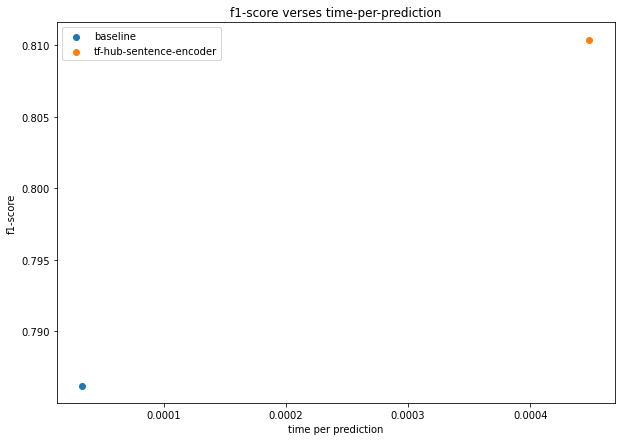

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results['f1-score'], label='baseline')
plt.scatter(model_6_time_per_pred, model_6_pretrained_results['f1-score'], label='tf-hub-sentence-encoder')
plt.legend()
plt.title("f1-score verses time-per-prediction")
plt.xlabel('time per prediction')
plt.ylabel('f1-score')
plt.show()